<a href="https://colab.research.google.com/github/mohit2520/Assi./blob/main/Assignment_1_Nearest_Neighbours_%26_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicting Price of House using KNearestNeighbour Regressor
1. Use pandas to get some insights into the data

2. Show some interesting visualization of the data

3. Manage data for training & testing 

4. Finding a better value of k 

In [41]:
# imort part
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


In [42]:
# reading the data set 
data_set = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")


In [43]:
df = pd.DataFrame(data=data_set)
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [44]:
# display top 5 data set
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [45]:


# display bottom 5 data set
df.tail()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [46]:
# no of rows and columes in data set 
df.shape

(645, 8)

In [47]:
# column availabel in data 
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [48]:
# information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [49]:
# mean, max,min all col wise 
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [50]:
# check the null value 
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

<BarContainer object of 25 artists>

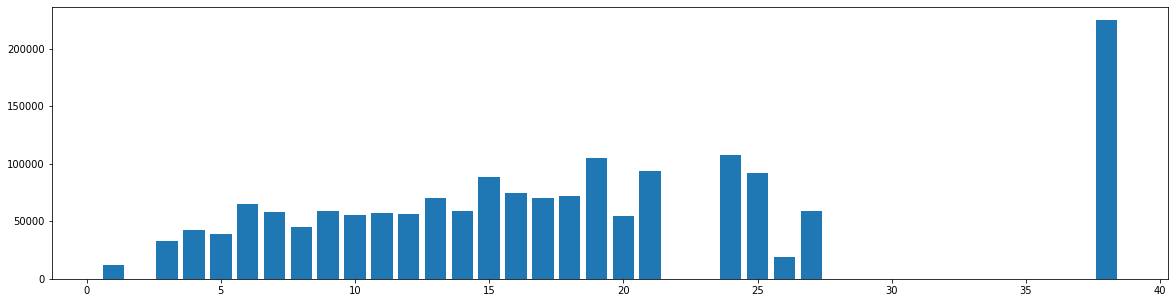

In [51]:
# to find price as per the total floor
df_gp1 = df.groupby(['TotalFloor'], as_index=False)['Price'].mean()
plt.figure(figsize= (20, 5))
plt.bar(df_gp1['TotalFloor'], df_gp1['Price'])

<BarContainer object of 21 artists>

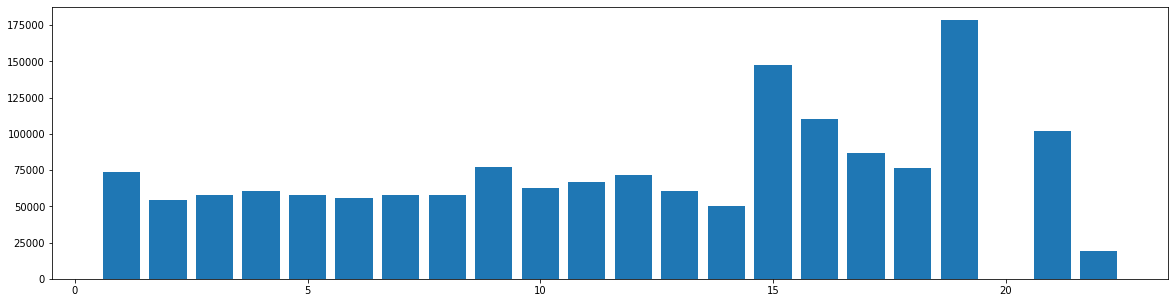

In [52]:
# to find price as per the floor
df_gp1 = df.groupby(['Floor'], as_index=False)['Price'].mean()
plt.figure(figsize= (20, 5))
plt.bar(df_gp1['Floor'], df_gp1['Price'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 <a list of 73 Text major ticklabel objects>)

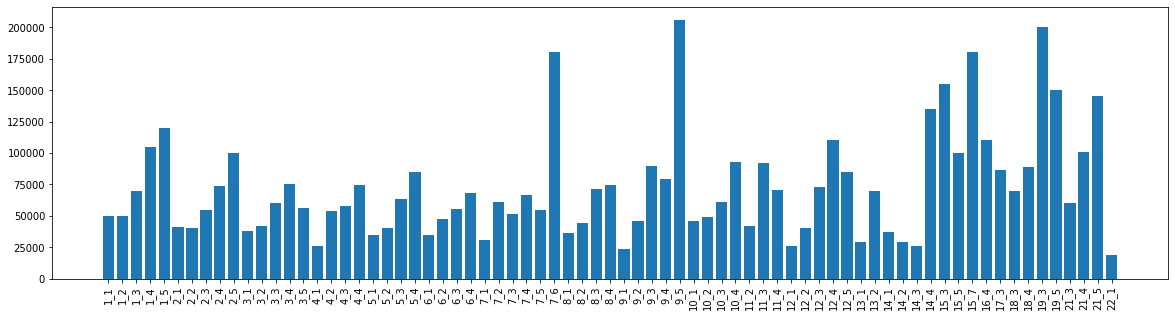

In [53]:
# Price as per the floor and bedroom
df_gp1 = df.groupby(['Floor', 'Bedroom'], as_index=False)['Price'].mean()
plt.figure(figsize= (20, 5))
plt.bar(df_gp1['Floor'].astype(str)+'_'+df_gp1['Bedroom'].astype(str), df_gp1['Price'])
plt.xticks(rotation=90)

In [54]:
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [55]:
X = df.drop(['Price' ,'Unnamed: 0'], axis = 1)
Y = df['Price']

In [56]:
X

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2


In [57]:

Y

0      62000
1      78000
2      58000
3      45000
4      45000
       ...  
640    45000
641    24800
642    45000
643    65000
644    36000
Name: Price, Length: 645, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

In [61]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((516, 6), (129, 6), (516,), (129,))

In [63]:
# using kneighbores Regressor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7605159729360103

In [64]:
# using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7101964960563816

In [66]:
X

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2


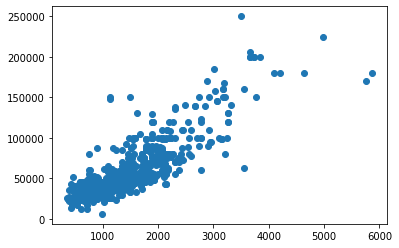

In [67]:
# price as per square feet
plt.scatter(X['Sqft'], Y)

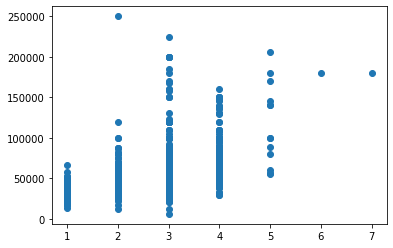

In [68]:
# price as per Bedroom 
plt.scatter(X['Bedroom'], Y)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [70]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [72]:
model.score(X_test, Y_test)

0.09302325581395349

In [77]:
accuracy_output = []
for k in range(1, 80, 2):
  model = KNeighborsClassifier(n_neighbors =k)
  model.fit(X_train, Y_train)
  accuracy_output.append(model.score(X_test, Y_test))

In [78]:
max(accuracy_output)

0.29457364341085274

In [79]:
np.argmax(accuracy_output)

0